In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1D Ising model + Transfer matrix

* Construct the transfer matrix at temperature $T$ with external field $B$
* Find the eivenvalues of the transfer matrix and compare to the exact results.
* Evaluate the partition function $Z$ at different system size $N$ and $T$, $B$. Compare to the exact results.
* For a fixed $N$, $T$, $B$, evaluate $\langle S_0 S_j\rangle$ where $j=0,1,\cdots N$. 
* Plot $\langle S_0 S_j\rangle$ up to $j=N/2$ and show that it decays exponentially.
  * Please try several $N$, $T$, $B$. What is the largest $N$ you can go? What is the lowest $T$ you can go?

In [109]:
###   testing parameter   ###

k_b = 1
J = 1
temperature = 1
m_field = 0.1

###   end   ###

def create_transfer_metrix(T, B):
    matrix = np.zeros((2,2), dtype = float)
    matrix[0][0] = np.exp((J + B)/(k_b * T))
    matrix[0][1] = np.exp((-J)/(k_b * T))
    matrix[1][0] = np.exp((-J)/(k_b * T))
    matrix[1][1] = np.exp((J - B)/(k_b * T))
#     print(matrix) 
    return(matrix)

def exact_eigen(T, B):
    lambda_ = np.zeros(2)
    lambda_[0] = np.exp(J/(k_b * T))*np.cosh(B/(k_b * T)) + np.sqrt(np.exp(-2*J/(k_b * T)) + np.exp(2*J/(k_b * T))*np.sinh(B/(k_b * T))**2)
    lambda_[1] = np.exp(J/(k_b * T))*np.cosh(B/(k_b * T)) - np.sqrt(np.exp(-2*J/(k_b * T)) + np.exp(2*J/(k_b * T))*np.sinh(B/(k_b * T))**2)
    return lambda_

In [110]:
test_matrix = create_transfer_metrix(temperature, m_field)

In [111]:
eigenvalue, eigenvector = np.linalg.eig(test_matrix)
exact_eigenvalue = exact_eigen(temperature, m_field)
print('eigenvalue:', eigenvalue)
print('exact eigenvalue:', exact_eigenvalue)

eigenvalue: [3.1895662  2.27420294]
exact eigenvalue: [3.1895662  2.27420294]


In [112]:
def partition_function(N, T, B):
    transfer_matrix = create_transfer_metrix(T, B)
    eigenvalue, eigenvector = np.linalg.eig(transfer_matrix)
    partition = np.trace(np.linalg.matrix_power(transfer_matrix, N))
    return partition, eigenvalue

In [113]:
size = 10
Z, eigenvalue = partition_function(size, temperature, m_field)
print('for n = 10')
print('exact partition:', Z)
print('thermodynamic limit:', eigenvalue[0]**size)

size = 100
Z, eigenvalue = partition_function(size, temperature, m_field)
print('for n = 100')
print('exact partition:', Z)
print('thermodynamic limit:', eigenvalue[0]**size)

for n = 10
exact partition: 112673.09167673158
thermodynamic limit: 108972.32111260641
for n = 100
exact partition: 2.3613589804378614e+50
thermodynamic limit: 2.361358980437866e+50


In [118]:
def impurity_matrix():
    return np.array([[1, 0],
                   [0, -1]])
def correlation_function(N, T, B, j):
    j = int(j)
    t_matrix = create_transfer_metrix(T, B)
    partition = np.trace(np.linalg.matrix_power(t_matrix, N))
    i_matrix = impurity_matrix()
    correlation_matrix = (i_matrix @ np.linalg.matrix_power(t_matrix, j) @ i_matrix @ np.linalg.matrix_power(t_matrix, N - j))
    correlation = np.trace(correlation_matrix) / partition
    return correlation

In [119]:
def CF_plot(N, T, B):
    result = np.zeros(N)
    for j in range (N):
        result[j] = correlation_function(N, T, B, j)
    return result

In [129]:
CF_128_T_100 = CF_plot(128, 1, 0)
CF_128_T_075 = CF_plot(128, 0.75, 0)
CF_128_T_025 = CF_plot(128, 0.25, 0)

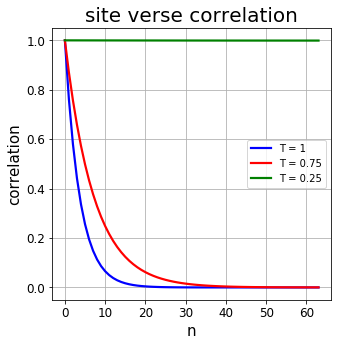

In [130]:
time = np.linspace(0, np.size(CF_128_T_100) - 1, np.size(CF_128_T_100))
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(time[0:64], CF_128_T_100[0:64], color='blue', linewidth=2.2, linestyle='-', label = 'T = 1')
ax.plot(time[0:64], CF_128_T_075[0:64], color='red', linewidth=2.2, linestyle='-', label = 'T = 0.75')
ax.plot(time[0:64], CF_128_T_025[0:64], color='green', linewidth=2.2, linestyle='-', label = 'T = 0.25')

ax.legend()
ax.set_xlabel('n',fontsize=15)
ax.set_ylabel('correlation',fontsize=15)
ax.set_title('site verse correlation',fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()

In [133]:
CF_128 = CF_plot(128, 1, 0)
CF_256 = CF_plot(256, 1, 0)
CF_512 = CF_plot(512, 1, 0)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in log


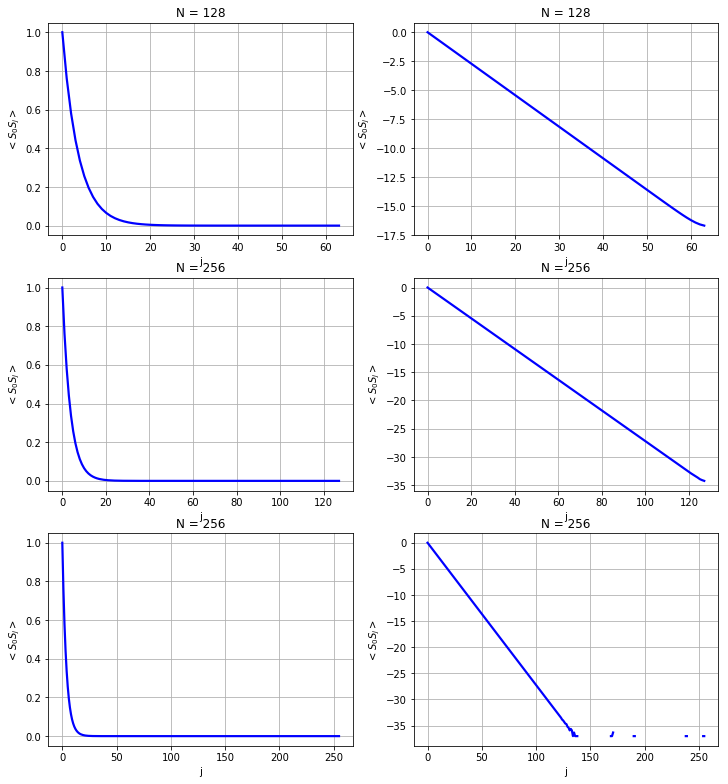

In [134]:
plt.figure(figsize=(12, 18))
plt.subplot(4, 2, 1)
plt.plot(np.arange(128//2), CF_128[0:64],color='blue', linewidth=2.2, linestyle='-')
plt.xlabel('j')
plt.ylabel('$<S_0S_j>$')
plt.title('N = 128')
plt.grid()

plt.subplot(4, 2, 2)
plt.plot(np.arange(128//2), np.log(CF_128[0:64]),color='blue', linewidth=2.2, linestyle='-')
plt.xlabel('j')
plt.ylabel('$<S_0S_j>$')
plt.title('N = 128')
plt.grid()

plt.subplot(4, 2, 3)
plt.plot(np.arange(256//2), CF_256[0:128],color='blue', linewidth=2.2, linestyle='-')
plt.xlabel('j')
plt.ylabel('$<S_0S_j>$')
plt.title('N = 256')
plt.grid()

plt.subplot(4, 2, 4)
plt.plot(np.arange(256//2), np.log(CF_256[0:128]),color='blue', linewidth=2.2, linestyle='-')
plt.xlabel('j')
plt.ylabel('$<S_0S_j>$')
plt.title('N = 256')
plt.grid()

plt.subplot(4, 2, 5)
plt.plot(np.arange(512//2), CF_512[0:256],color='blue', linewidth=2.2, linestyle='-')
plt.xlabel('j')
plt.ylabel('$<S_0S_j>$')
plt.title('N = 256')
plt.grid()

plt.subplot(4, 2, 6)
plt.plot(np.arange(512//2), np.log(CF_512[0:256]),color='blue', linewidth=2.2, linestyle='-')
plt.xlabel('j')
plt.ylabel('$<S_0S_j>$')
plt.title('N = 256')
plt.grid()

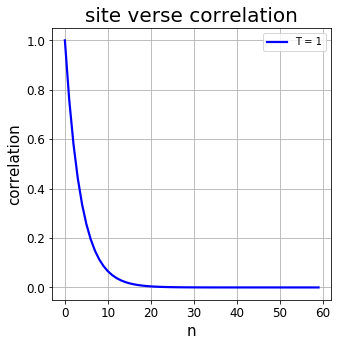

In [150]:
number = 600
CF_test = CF_plot(number, 1, 0)

time_test = np.linspace(0, np.size(CF_test) - 1, np.size(CF_test))
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(time_test[0:int(number/10)], CF_test[0:int(number/10)], color='blue', linewidth=2.2, linestyle='-', label = 'T = 1')

ax.legend()
ax.set_xlabel('n',fontsize=15)
ax.set_ylabel('correlation',fontsize=15)
ax.set_title('site verse correlation',fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()

# The smallest T is almost equal to '0.25'
# The largest N is almost equal to '600'